# Mathematical Representations
ISMRM Diffusion Study Group Meeting, Kyoto 2025.

By Chantal Tax and Sune Jespersen

#Aim

The aim of this session is to cover a number of common representations of the diffusion signal - that is, broadly applicable mathematical expressions that capture the signal dependence on diffusion weighting parameters (Novikov et al., 2018). A defining property of representations is that their parameters are generally non-specific to tissue microstructure.


# Refresher: Taylor expansion

Any sufficiently well-behaved function $f(x)$ can be expanded around a point $x_0$  in a power law series:
$$ f(x) = \sum_{n=0}^\infty \frac1{n!} f^{(n)}(x_0) (x-x_0)^n$$
where $f^{(n)}(x_0)$ is the $n$th derivative of $f(x)$ wrt $x$, evaluated at $x = x_0$. Close to $x_0$, a good approximation to $f(x)$ is obtained by including only a finite, possibly small, number of terms $N$:
$$ f(x) \approx \sum_{n=0}^N \frac1{n!} f^{(n)}(x_0) (x-x_0)^n$$

The following script interactively demonstrates the concepts of a Taylor expansion. You can choose a function, the center of expansion $x_0$, and the order of the Taylor polynomial $n$, visualizing how the polynomial approximates the function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown

# Define functions to expand
def f_sin(x):
    return sympy.sin(x)

def f_exp(x):
    return sympy.exp(-x)

def f_cos(x):
    return sympy.cos(x)

def taylor_expansion(func, center, order, x_range):
    """Compute the Taylor expansion of a function."""
    taylor_poly = np.zeros_like(x_range)
    factorial = 1
    x_ = sympy.Symbol('x_')

    for n in range(order + 1):
        if n > 0:
            factorial *= n
            func_diff = sympy.diff(func(x_), x_, n)
        else:
            func_diff = func(x_)
        func_diff = sympy.lambdify(x_, func_diff, 'numpy')
        nth_term = (func_diff(center) / factorial) * ((x_range - center) ** n)
        taylor_poly += nth_term

    return taylor_poly

def plot_taylor(func_name, center, order):
    """Plot the function and its Taylor expansion."""
    x_range = np.linspace(0, 10, 500)
    if func_name == "sin(x)":
        func = f_sin
    elif func_name == "exp(-x)":
        func = f_exp
    elif func_name == "cos(x)":
        func = f_cos

    # Calculate function and Taylor expansion
    taylor_poly = taylor_expansion(func, center, order, x_range)
    x = sympy.Symbol('x')
    func = sympy.lambdify(x, func(x), 'numpy')
    y = func(x_range)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_range, y, label=f"{func_name}", linewidth=2)
    plt.plot(x_range, taylor_poly, '--', label=f"Taylor (order {order})", linewidth=2)
    plt.axvline(x=center, color='red', linestyle='--', label="Center of Expansion")
    plt.title(f"{func_name} and its Taylor Expansion (Order {order})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim(np.min(y), np.max(y))
    plt.legend()
    plt.grid()
    plt.show()

# Interactive widget
interact(
    plot_taylor,
    func_name=Dropdown(options=["sin(x)", "exp(-x)", "cos(x)"], value="exp(-x)", description="Function"),
    center=FloatSlider(value=0, min=-5, max=5, step=0.1, description="Center"),
    order=IntSlider(value=4, min=0, max=10, step=1, description="Order")
)

interactive(children=(Dropdown(description='Function', index=1, options=('sin(x)', 'exp(-x)', 'cos(x)'), value…

<function __main__.plot_taylor(func_name, center, order)>

# Cumulant expansion



The cumulant expansion (Jensen & Helpern, 2010; Jensen et al., 2005; Kiselev, 2011; Kiselev, 2017; Novikov et al., 2016) is a generally applicable expression of the diffusion signal based on a Taylor series expansion of the logarithm of the signal
$$ S = S_0 \big\langle \exp(-i\varphi)\big\rangle \equiv S_0 \int P(\varphi)e^{-i\varphi}$$
where $P(\varphi)$ is the probability distribution density of spin phases, $\varphi$ and $S_0$ is the signal in the absence of diffusion weighting. Thus, angular brackets $\langle \cdot \rangle$ denote the ensemble average (i.e. average over spin), and hence the normalized signal is $S/S_0 = \langle e^{-i\varphi}\rangle$. It turns out to be useful to expand the logarithm of the signal rather than the signal itself. For this we consider the so-called cumulant expansion:
$$ \ln \langle \exp(i\lambda \varphi)\rangle = \sum_{n=1}^\infty c_n\frac{(i\lambda)^n}{n!}
$$
where $c_n$ are the *cumulants* and  $\lambda$ is an auxiliary variable controlling the expansion. The cumulants can be found by differentiation
$$ c_n =(-i)^n \frac{d^n}{d\lambda^n}\Big|_{\lambda=0} \ln \langle \exp(i\lambda \varphi)\rangle$$
Hence we have for the diffusion signal ($\lambda = 1$)
$$ \ln (S/S_0) = \sum_{n=1}^\infty \frac{c_n}{n!}
$$


---




### Exercise 1


a) Prove that
\begin{equation}
    S/S_0 = \langle e^{-i\varphi} \rangle \simeq \exp\left(-i\langle \varphi \rangle - \frac12 (\langle \varphi^2\rangle - \langle \varphi\rangle^2) \right)
\end{equation}
to second order in $\varphi$.  In other words, prove that the first two cumulants are the mean and variance of the spin phases:
$$ c_1 = \langle \varphi \rangle\\
c_2 = \langle \varphi^2\rangle - \langle \varphi\rangle^2$$
This is called the **Gaussian phase approximation**. This is because when $P(\varphi)$ is Gaussian, *this result is exact*. In particular, all other cumulants vanish.

**Solution/hint:** Consider $\ln \langle e^{-x}\rangle$ with $x = i\varphi$. Combine the Taylor expansions $e^{-x} \simeq 1 - x + \frac12 x^2$ and $\ln(1-y)\simeq -y-\frac12 y^2$ by using $y = 1- \langle e^{-x} \rangle$.

b) Now assume all odd moments $\langle\varphi^{2n+1}\rangle$ vanish. Derive
\begin{equation}
    \langle e^{-i\varphi} \rangle \simeq \exp\left( -\frac12 \langle \varphi^2\rangle +\frac1{4!} (\langle \varphi^4\rangle -3\langle \varphi^2\rangle^2  \right)
\end{equation}
valid to fourth order in $\varphi$.

c) Next, insert the expression for $\varphi = q (x(t)-x(0))$ in the case of narrow pulse diffusion (in 1D), and express everything in terms of $b$ (and $t$). Identify the cumulants $c_2$ and $c_4$, and an expression for the diffusivity $D(t)$.  


---

Our phase $\varphi$ will be proportional to the diffusion weighting, which we can essentially treat as our expansion parameter $\lambda \sim \sqrt{b}$. The general cumulant expansion can thus be formulated in terms of powers of the diffusion weighting $b$, since odd powers vanish:
$$ \ln (S(b)/S_0) = \sum_{n=1}^\infty \tilde{c}_n \frac{b^n}{n!}
$$
and $\tilde{c}_n=c_{2n}/b^n$. We have the general expression
$$ \tilde{c}_n = \left.\frac{d^n}{db^n} \ln (S(b)/S_0)\right|_{b=0}.$$ They generally depend on diffusion time, and for non-narrow pulses, they depend on the entire shape of the diffusion gradient, or $q(t)$.

The cumulant expansion is rooted in probability theory (Kampen, 2007) and is arguably universally valid for MRI of diffusion in biological tissues. In practice, this (generally) infinite series is terminated after a small number of terms corresponding to some maximum power of b, selected to provide an adequate approximation of the measured signal - the larger the probed b-range, the more terms are needed in general. However, due to a finite convergence radius, beyond it,  the series approximation will eventually stop improving as a function of the number of terms.

## DTI/DKI

DTI/DKI are special cases of the cumulant expansion terminated at orders $b$ and $b^2$, respectively:
$$ \ln (S(b)/S_0) \approx -bD(t) +\frac1{6}b^2 D^2 K(t) +\ldots$$
  DTI often provides an excellent approximation to the diffusion signal below $bD\approx1$, and DKI below $bD \approx 2\mathrm{-}3$. In the case of multiple, non-exchanging Gaussian compartments, the kurtosis is related to the variance of diffusivities over compartments.


---



### Exercise 2


The (1D) biexponential model for the diffusion signal is
$$S(b) = f_1 e^{-bD_1} + f_2 e^{-bD_2}.$$
where $D_1$ and $D_2$ are intrinsic diffusivities for two non-exchanging compartments of volume (signal) fractions $f_1$ and $f_2$, with $f_1+f_2 = 1$.

a) Derive explicit expressions for diffusivity $D$ and kurtosis $K$ in terms of the parameters $f_1, f_2, D_1, D_2$.

b) Plot the signal and the two approximations (DTI and DKI) vs $b$ for bi-exponential model without exchange with parameters $f_1 = 0.3$, $f_2 = 1-f_1$, $D_1 = 0.5\,\mathrm{\mu m^2/ms}$ and $D_2 = 1.2\,\mathrm{\mu m^2/ms}$.


---



### Exercise 3


What do you expect to happen to the kurtosis as a function of diffusion time if exchange between the 2 components is added?
Discuss with your neighbour.


---

## Convergence radius

The Cumulant expansion is a power series in $b$ evaluated at $b=0$, and the further away one moves from this point, the more terms are needed to achieve high approximation accuracy. However, expansions have a convergence radius (in this case a specific $b$-value) above which adding more terms may result in a more dramatic deviation from the analytical function.

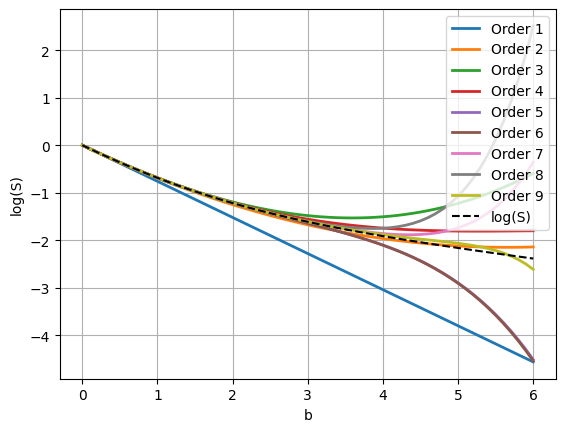

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define symbolic variables
b, f, D1, D2 = sp.symbols('b f D1 D2')

# Define the function S
S = f * sp.exp(-b * D1) + (1 - f) * sp.exp(-b * D2)

# Convert S to log(S)
log_S = sp.log(S)

# Define the b values for plotting
bv = np.arange(0, 6.1, 0.1)

# Initialize the figure
plt.figure()

# Loop over different Taylor series orders
for order in range(2, 11):
    T = sp.series(log_S, b, n=order).removeO()  # Taylor expansion and remove O notation
    fT = sp.lambdify((b, f, D1, D2), T, 'numpy')  # Convert symbolic function to numerical

    # Plot the Taylor approximation
    plt.plot(bv, fT(bv, 0.7, 1, 0.2), linewidth=2, label=f'Order {order-1}')

# Convert log(S) to a numerical function
fS = sp.lambdify((b, f, D1, D2), log_S, 'numpy')

# Plot the original function
plt.plot(bv, fS(bv, 0.7, 1, 0.2), '--k', label='log(S)')

# Formatting the plot
plt.xlabel('b')
plt.ylabel('log(S)')
plt.legend()
plt.grid(True)
plt.show()


## Intermezzo: Fitting a mathematical expression to data

Parameter estimation from noisy data involves determining the most likely values of underlying model parameters while accounting for measurement uncertainties. Common approaches include least squares fitting, maximum likelihood estimation (MLE), and Bayesian inference, each offering different advantages depending on noise characteristics and prior knowledge.

Here we will look at an example of nonlinear least squares (NLS) fitting of the kurtosis equation to data generated from a bi-exponential model.

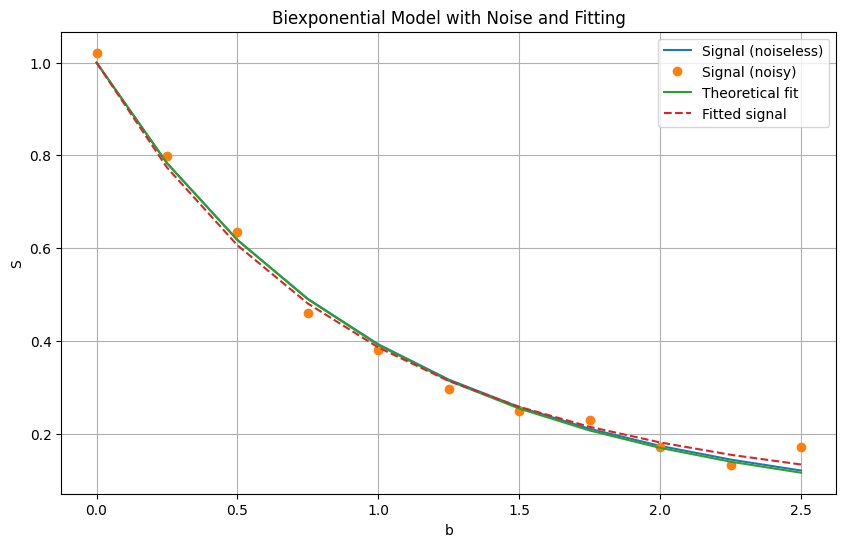

Fitted D: 1.0502
Fitted K: 0.5344
Actual D: 0.9900
Actual K: 0.3150


In [ ]:
# prompt: Generate data from S = f1 * exp(-b * D1) + f2 * exp(-b * D2) for b = 1:0.25:2.5 with f1 = 0.3, f2 = 1-f1, D1 = 0.5, and D2 = 1.2. Plot the datapoints. Add random Gaussian noise with a standard deviation of 1/50 and plot the noisy datapoints. Compute D = -(-D1*f1 - D2*f2)/(f1 + f2) and K = 3.0*(f1 + f2)*(D1**2*f1 + D2**2*f2 - (D1*f1 + D2*f2)**2/(f1 + f2))/(-D1*f1 - D2*f2)**2 and plot the signal exp(-b*D + 1/6 *D^2 *K * b^2). Fit exp(-b*D + 1/6 *D^2 *K * b^2) to the noisy signal with nonlinear least squares and plot the estimated signal for the fitted D and K

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Parameters
f1 = 0.3
f2 = 1 - f1
D1 = 0.5
D2 = 1.2
b_values = np.arange(0, 2.51, 0.25)

# Generate data
S = f1 * np.exp(-b_values * D1) + f2 * np.exp(-b_values * D2)

# Add Gaussian noise
SNR = 50
noise = np.random.normal(0, 1/SNR, len(b_values))
S_noisy = S + noise

# Compute D and K
D = -(-D1*f1 - D2*f2)/(f1 + f2)
K = 3.0*(f1 + f2)*(D1**2*f1 + D2**2*f2 - (D1*f1 + D2*f2)**2/(f1 + f2))/(-D1*f1 - D2*f2)**2

# Theoretical signal
def theoretical_signal(b, D_fit, K_fit):
    return np.exp(-b*D_fit + (1/6) * D_fit**2 * K_fit * b**2)

# Fit the theoretical signal to the noisy data
popt, pcov = curve_fit(theoretical_signal, b_values, S_noisy, p0=[D, K])
D_fit, K_fit = popt

# Estimated signal
S_fit = theoretical_signal(b_values, D_fit, K_fit)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(b_values, S, label='Signal (noiseless)')
plt.plot(b_values, S_noisy, 'o', label='Signal (noisy)')
plt.plot(b_values, theoretical_signal(b_values, D, K), label='Theoretical fit')
plt.plot(b_values, S_fit, '--', label='Fitted signal')


plt.xlabel('b')
plt.ylabel('S')
plt.title('Biexponential Model with Noise and Fitting')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted D: {D_fit:.4f}")
print(f"Fitted K: {K_fit:.4f}")
print(f"Actual D: {D:.4f}")
print(f"Actual K: {K:.4f}")

---

###Exercise 4
Modify the code above to examine the dependence of the estimated D on the maximum b-value used when fitting to the DTI expression, in the limit of zero noise (infinite SNR). (If time allows, you can do also for DKI and compare).

---

# Tensor Encoding in Multiple Gaussian Comparments
The biexponential model is a simple example of a special class of systems, "Multiple Gaussian Compartments" (MGM), consisting of a number of non-exchanging compartments that each are well approximated by Gaussian (DTI) diffusion. It can therefore be fully characterized by the distribution of diffusion coefficients or diffusion tensors, $P(\text{D})$. Such systems can be effectively interrogated using tensor encoding. That is, instead of having just a single diffusion gradient direction as the standard Stejskal-Tanner encoding (called single diffusion encoding or SDE), we can have more general wave forms. We then define a diffusion weighting *matrix*, which for SDE is $B_{ij} = q_iq_j t= b \hat{g}_i\hat{g}_j$ or $\text{B} = b \hat{\mathbf{g}}\hat{\mathbf{g}}^\text{T}$, where $\hat{\mathbf{g}}$ is the diffusion direction. We can now generalize and have, for example, double diffusion encoding (DDE) where $B = b_1\hat{\mathbf{g}}_1\hat{\mathbf{g}}_1^\text{T} + b_2\hat{\mathbf{g}}_2\hat{\mathbf{g}}_2^\text{T}$, using two directions $\hat{\mathbf{g}}_1$ and $\hat{\mathbf{g}}_2$. The diffusion signal for MGM systems can then be written
$$ S/S_0 = \int d\text{D} P(\text{D}) \exp(-B_{ij}D_{ij}) = \langle\exp(-B_{ij}D_{ij})\rangle $$
where now the angular brackets define averaging over $P(\text{D})$. (Note that we use the Einstein summation convention that sum over repeated indices is implied, i.e., $B_{ij}D_{ij} = \sum_{i,j}B_{ij}D_{ij} = \text{B}:\text{D}$).
A particularly useful case is $\text{B} = b\text{I}/3$, isotropic (or spherical) diffusion encoding, for which $B_{ij}D_{ij} = b\bar{\text{D}}$, where $\bar{\text{D}}$ is mean diffusivity. Then the signal is
\begin{align}
S/S_0 &= \int d\text{D} P(\text{D}) \exp(-b\bar{\text{D}}) = \langle\exp(-b\bar{\text{D}})\rangle \\
& \simeq \exp\left(-b\langle\bar{\text{D}}\rangle + \frac12 b^2 \left( \langle \bar{\text{D}}^2\rangle - \langle \bar{\text{D}}\rangle^2\right) \right)
\end{align}
Thus, the kurtosis $K_I$ in this case (isotropic kurtosis) is proportional to the variance of mean diffusivities
$$\bar{\text{D}}^2 K_I = 3\left( \langle \bar{\text{D}}^2\rangle - \langle \bar{\text{D}}\rangle^2\right)$$
It turns out that so-called "powder averaging" provides a different way to probe kurtosis of MGC. A powder is a substance with multiple orientations (i.e. isotropic) of a fundamental unit (e.g. crystals). Whether we rotate the sample or the diffusion gradients, followed by averaging, is equivalent, so for obvious practical reasons we choose the latter. Then the powder averaged SDE signal, $\bar{S}$ is
$$ \bar{S}(b)/S_0 = \int \frac{d\hat{\mathbf{g}}}{4\pi}\int d\text{D}\, P(\text{D})\exp(-b\hat{\mathbf{g}}^\text{T}D\hat{\mathbf{g}})=\langle\overline{\exp(-b\hat{\mathbf{g}}^\text{T}D\hat{\mathbf{g}})}\rangle =\langle\overline{\exp(-bD(\hat{\mathbf{g}}))} \rangle$$
where the overline (bar) denotes orientational averaging of $\hat{\mathbf{g}}$. Using essentially the Gaussian "phase" approximation, the last expression becomes
$$\bar{S}(b)/S_0 = \langle\overline{\exp (-bD (\hat{\mathbf{g}}))}\rangle \approx \exp\left(-b\langle\overline{D(\hat{\mathbf{g}})}\rangle + \frac12 b^2\left(
\overline{\langle D(\hat{\mathbf{g}})^2\rangle}-\langle\overline{D(\hat{\mathbf{g}})}\rangle^2 \right)\right)$$ and we can identify the "total kurtosis" $K_T$ as  
$$\bar{D}^2K_T = 3\left( \langle\overline{D(\hat{\mathbf{g}})^2}\rangle-\langle\overline{D( \hat{\mathbf{g}})}\rangle^2 \right),$$
i.e. the variance of the directional diffusivity over both compartments and directions. Intuitively, such variance can happen because of both differences in the trace of D across compartments, i.e. isotropic kurtosis $K_I$, and because they have different orientations, so-called anisotropic kurtosis $K_A$. Indeed, one finds that (**for MGC only**)
$$K_T = K_A + K_I$$
where
$$ \bar{D}^2K_A = \frac65 \langle \sum_{i=1}^3(\lambda_i -\bar{D})^2\rangle/ = \frac65 \langle\text{Var}(\lambda)\rangle,$$
where $\lambda_i$ are the diffusion tensor eigenvalues in a compartment. (This result can be derived by using the identity $\overline{g_ig_jg_kg_l} = \tfrac{1}{15}(\delta_{ij}\delta_{kl}+\delta_{ik}\delta_{jl}+\delta_{il}\delta_{jk})$). For non-Gaussian compartments, there will be an additional contribution from *microscopic kurtosis*.


---

###Exercise 5

Write explicit expressions for diffusivity and kurtosis for the biexponetial model also in the 3D case with $D_{1,ij} = d_1 n_in_j$ with $\hat{n}$ a unit vector, and $D_{2,ij} = d_2 \delta_{ij}$. What kind of system does this model? If time allows: What are $D_{ij}$ (or $D(\hat{g})$), $\bar{D}^2K_I$ and $\bar{D}^2K_A$?

---

# Spherical harmonics


The diffusion signal as a function of the diffusion encoding axis for fixed diffusion weighting is formally a function on the sphere. Such functions can be expanded in terms of basis functions such as the spherical harmonics in which case the expansion is called a Laplace series. Spherical harmonics, $Y_{lm}$, are enumerated by two indices, $l$  and $m$, also called orbital and magnetic quantum number, with $l$ ranging from 0 to  and $m$ between $-l$ and $l$. The set of spherical harmonics form a complete and orthonormal set of functions on the sphere. The angular resolution is an increasing function of $l$, and as for the cumulant expansion, the infinite Laplace series is terminated at some maximum $l=L_{\text{max}}$ thus setting an upper limit on the angular size of resolvable features.


###Exercise 6

Spherical harmonics are given by
$$ Y_{lm}(\theta,\phi)\propto P_{lm}(\cos(\theta) e^{im\phi} $$
where the $P_{lm}$ are associated Legendre polynomials. In the special case of $m = 0$, they reduce to Legendre polynomials $P_l(\cos\theta)$, a polynomial of degree $l$. What is roughly the angular resolution of $Y_{l0}(\theta,\phi)\propto P_{l}(\cos(\theta))$? (Hint: determine the width of the lobes)

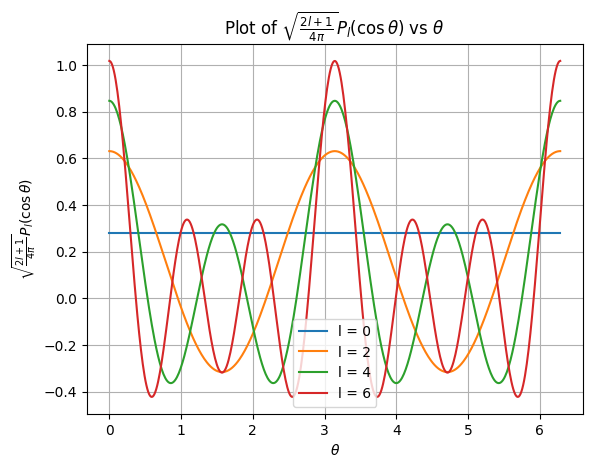

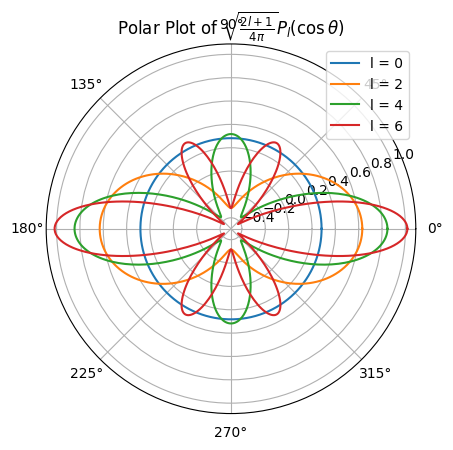

In [ ]:
# Parameters
theta = np.linspace(0, 2*np.pi, 500)  # Angle theta from 0 to pi

# Legendre Polynomials
for l in [0, 2, 4, 6]:
    Pl = legendre(l)
    r = np.sqrt((2 * l + 1) / (4 * np.pi)) * Pl(np.cos(theta))
    plt.plot(theta, r, label=f'l = {l}')

# Plot settings
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\sqrt{\frac{2l+1}{4\pi}} P_l(\cos\theta)$')
plt.title(r'Plot of $\sqrt{\frac{2l+1}{4\pi}} P_l(\cos\theta)$ vs $\theta$')
plt.legend()
plt.grid(True)
plt.show()


# Polar plot
for l in [0, 2, 4, 6]:
    Pl = legendre(l)
    r = np.sqrt((2 * l + 1) / (4 * np.pi)) * Pl(np.cos(theta))
    plt.polar(theta, r, label=f'l = {l}')

plt.title(r'Polar Plot of $\sqrt{\frac{2l+1}{4\pi}} P_l(\cos\theta)$')
plt.legend()
plt.grid(True)
plt.show()


___

Given a diffusion signal $S(b,\hat{\mathbf{g}})$ for fixed diffusion weighting $b$, the coefficients $S_{lm}$ of the Laplace series
$$ S(b,\hat{\mathbf{g}}) = \sum_{l,m} S_{lm} Y_{lm}(\theta,\phi)$$ are found from by integrating over the sphere
$$ S_{lm} = \int Y^*_{lm}(\hat{\mathbf{g}}) S(b,\hat{\mathbf{g}})d\hat{\mathbf{g}}$$
where asterisk denotes the complex conjugate. Only even $l$ contribute, because odd $l$ spherical harmonics are odd while the diffusion signal is even.

###Exercise 7

Plot the signal $S(\hat{\mathbf{g}}) = 0.6 \exp(-12 g_z^2) +0.4\exp(-12 g_x^2)$  over the sphere $\hat{\mathbf{g}} \in S_2$ (glyph), and compare to the spherical harmonics expansions with $L_{max} = 2,4,6,8$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D

# Define the S function
def S(gx, gz):
    return 0.6 * np.exp(-12 * gz**2) + 0.4 * np.exp(-12 * gx**2)

# Define the spherical harmonics approximation
def laplace_transform_approximation(gx, gy, gz, Lmax):
    theta = np.arccos(gz)
    phi = np.arctan2(gy, gx)
    S_values = S(gx, gz)
    coefficients = compute_real_spherical_harmonics_lsq(np.column_stack((gx, gy, gz)), S_values, Lmax)

    result = np.zeros_like(gx)
    idx = 0
    for l in range(0, Lmax + 1, 2):  # Iterate over degrees l (0, 2, ..., Lmax)
        Y_lm = real_spherical_harmonic(l, theta, phi)
        result += np.dot(coefficients[idx:idx + 2 * l + 1], Y_lm)
        idx += 2 * l + 1
    return result

# Real spherical harmonics (simplified example for clarity)
def real_spherical_harmonic(l, theta, phi):
    m_vals = np.arange(-l, l + 1)
    Y_lm = np.array([sph_harm(m, l, phi, theta) for m in m_vals])
    return Y_lm.real

# Compute least-squares coefficients
def compute_real_spherical_harmonics_lsq(n, data, Lmax):
    num_samples = n.shape[0]
    num_coeffs = sum(2 * l + 1 for l in range(0, Lmax + 1, 2))
    Y = np.zeros((num_samples, num_coeffs))

    phi = np.arctan2(n[:, 1], n[:, 0])
    theta = np.arccos(n[:, 2])

    idx = 0
    for l in range(0, Lmax + 1, 2):
        Y[:, idx:idx + 2 * l + 1] = real_spherical_harmonic(l, theta, phi).T
        idx += 2 * l + 1

    coefficients = np.linalg.lstsq(Y, data, rcond=None)[0]
    return coefficients

# Visualization
def plot_approximations():
    N = 100
    z = np.linspace(-1, 1, N)
    phi = np.linspace(0, 2 * np.pi, N)
    theta, phi = np.meshgrid(np.arccos(z), phi)

    gx = np.sin(theta) * np.cos(phi)
    gy = np.sin(theta) * np.sin(phi)
    gz = np.cos(theta)

    # Add your code here

# Run the visualization
plot_approximations()


## Rotational invariants

The Laplace expansion has some nice properties. Among them is the fact that the  parameter combinations

$$S_l = \left(\frac{4\pi}{2l+1}\sum_m |S_{lm}|^2\right)^{1/2}$$

are rotationally invariant - they do not depend on the chosen coordinate system or how the brain is rotated.
In multiple Gaussian compartments (and other types of systems), when the individual compartments are identical apart from having different orientations $\hat{\mathbf{n}}$, the signal is given by a convolution
$$S(b,\hat{\mathbf{g}}) = (\mathcal{P}\otimes K)(\hat{\mathbf{g}})$$
where $K(b,\hat{\mathbf{g}}\cdot\hat{\mathbf{n}})$ is the signal from one compartment and $\mathcal{P}(\hat{\mathbf{n}})$ is the overall orientation distribution density of compartments. In such a case, it turns out that
$S_{lm} = p_{lm} K_l(b)$ (see next session for more details), and we can again define a rotational invariant

$$p_l = \left(\frac{4\pi}{2l+1}\sum_m |p_{lm}|^2\right)^{1/2}$$

NB Note that the proportionality constants depend on conventions: Here we use the convention that $\mathcal{P} = \tfrac1{4\pi} $ for an isotropic distribution, whereas the choice $\mathcal{P} = 1 $ (and compensatory definition of the surface integral measure) suggests the front factor $1/(4\pi(2l+1))$ instead.
When the compartments are axons, the function $\mathcal{P}$ is called the fiber orientation distribution function, or fODF.

### Exercise 8

The following exercise illustrates a kind of connection between diffusion weighting and angular resolution. Plot $S_l(b)$ vs $b$ for different $l$ for the signal function in Exercise 6, and try to formulate this connection based on your results.

In [ ]:
import numpy as np
from scipy.special import sph_harm, lpmv, factorial
import matplotlib.pyplot as plt

# Parameters and spherical grid generation
N = 100
Lmax_values = [2, 4, 6, 8]
z = np.linspace(-1, 1, N)
theta = np.arccos(z)
phi = np.linspace(0, 2 * np.pi, N)
theta, phi = np.meshgrid(theta, phi)

gx = np.sin(theta) * np.cos(phi)
gy = np.sin(theta) * np.sin(phi)
gz = np.cos(theta)

# Power per l-band computation
def compute_power_per_l(gx, gy, gz, b_values, Lmax):
    theta, phi = np.arccos(gz), np.arctan2(gy, gx)
    power_per_l = np.zeros((len(b_values), Lmax // 2 + 1))

    for b_idx, b in enumerate(b_values):
        S_values = Sb(gx, gz, b)
        coefficients = compute_real_spherical_harmonics_lsq(np.vstack((gx, gy, gz)).T, S_values, Lmax)
        idx = 0

        # Add your code here




###Exercise 9

The most anisotropic fODF has the form $\mathcal{P}(\theta,\phi)=\frac1{2\pi} \delta(1-\cos^2\theta)$  Derive the corresponding spherical harmonic coefficients $p_{lm}$ and rotational invariants $p_l$.
(Hints: $\mathcal{P}$ is independent on $\phi$, $\delta(1-x^2)=\delta(1-x)$ for $x\in[0, 1]$, $P_l(1) = 1$).

# Propagator imaging

The diffusion propagator describes the probability distribution of the displacement of water molecules from an initial position over a given time due to diffusion. When the gradient pulses are very short, the measurement becomes the Fourier transform of the voxel-averaged propagator, i.e. the average of propagators across all initial positions within a voxel.

$$P(\mathbf{r},t)=\langle P(\mathbf{x}_0,\mathbf{x}(t),t) \rangle_{\mathbf{x}_0}$$

$$P(\mathbf{r},t)=\int S(\mathbf{q})/S(0)e^{i\mathbf{q} \cdot \mathbf{r}} d\mathbf{r}$$

In the case of non-narrow pulses and/or multiple-direction encoding, the measurement represents a more complex entity than the propagator.

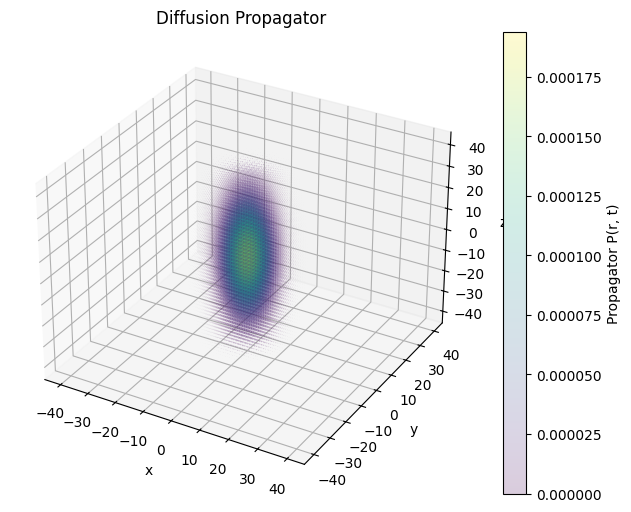

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def diffusion_propagator(r, D, t):
    """
    Compute the diffusion propagator for anisotropic diffusion tensor.

    Parameters:
    r : (N, 3) array of displacement vectors.
    D : (3, 3) diffusion tensor matrix.
    t : diffusion time.

    Returns:
    P : (N,) array of propagator values.
    """
    det_D = np.linalg.det(D)
    inv_D = np.linalg.inv(D)
    norm_factor = (4 * np.pi * t) ** (3 / 2) * np.sqrt(det_D)

    exp_term = np.einsum('ij,ij->i', r @ inv_D, r)  # Equivalent to r^T D^-1 r
    P = np.exp(-exp_term / (4 * t)) / norm_factor

    return P

# Define an example diffusion tensor (anisotropic)
D = np.array([[0.2, 0.0, 0.0],
              [0.0, 0.2, 0.0],
              [0.0, 0.0, 2.5]]) # Example tensor in μm^2/ms

t = 50.0  # Diffusion time in ms

# Generate a grid of points in 3D space
x = np.linspace(-40,40, 50)
y = np.linspace(-40,40, 50)
z = np.linspace(-40,40, 50)
X, Y, Z = np.meshgrid(x, y, z)
r_vectors = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T

# Compute the propagator values
P_values = diffusion_propagator(r_vectors, D, t)

# Reshape for visualization
P_values = P_values.reshape(X.shape)

# Plot the propagator
norm_values = P_values / np.max(P_values)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X, Y, Z, c=P_values, s=norm_values*50, cmap='viridis', alpha=0.2, marker='o', edgecolors='None')
plt.colorbar(sc, label='Propagator P(r, t)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Diffusion Propagator')
plt.show()


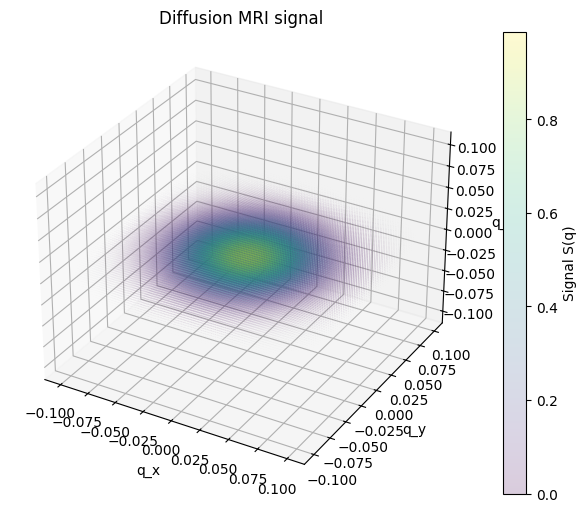

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Define the diffusion tensor (symmetric 3x3 matrix)
D = np.array([[0.2, 0.0, 0.0],
              [0.0, 0.2, 0.0],
              [0.0, 0.0, 2.5]])

t = 50.0  # Diffusion time in ms
S0 = 1.0   # Baseline signal (non-diffusion-weighted)

# Define q-space grid
q_vals = np.linspace(-0.1, 0.1, 70)  # q-values in 1/μm
Qx, Qy, Qz = np.meshgrid(q_vals, q_vals, q_vals, indexing='ij')

# Compute signal attenuation for each q vector
S_q = np.exp(-4 * np.pi**2 * t * (D[0,0] * Qx**2 + D[1,1] * Qy**2 + D[2,2] * Qz**2
                                   + 2*D[0,1]*Qx*Qy + 2*D[0,2]*Qx*Qz + 2*D[1,2]*Qy*Qz))
S_q *= S0  # Apply baseline signal

# Reshape for visualization
S_q = S_q.reshape(Qx.shape)

# Plot the propagator
norm_values = S_q / np.max(S_q)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(Qx, Qy, Qz, c=S_q, s=norm_values*10, cmap='viridis', alpha=0.2, marker='o', edgecolors='None')
plt.colorbar(sc, label='Signal S(q)')
ax.set_xlabel('q_x')
ax.set_ylabel('q_y')
ax.set_zlabel('q_z')
ax.set_title('Diffusion MRI signal')
plt.show()


The code below estimates the propagator with a discrete Fourier transform.

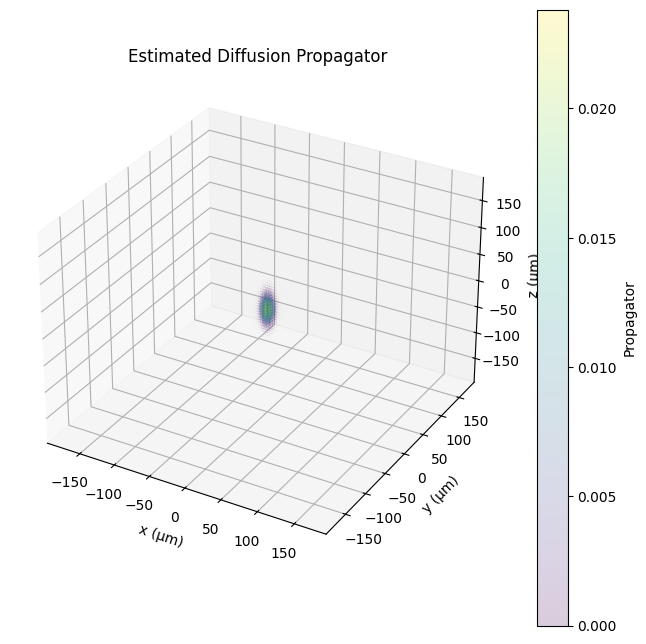

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import ifftn, ifftshift

# Define the diffusion tensor (symmetric 3x3 matrix)
D = np.array([[0.2, 0.0, 0.0],
              [0.0, 0.2, 0.0],
              [0.0, 0.0, 2.5]])  # Example tensor in μm^2/ms

t = 50.0  # Diffusion time in ms
S0 = 1.0   # Baseline signal (non-diffusion-weighted)

# Define q-space grid
q_vals = np.linspace(-0.1, 0.1, 70)  # q-values in 1/μm
Qx, Qy, Qz = np.meshgrid(q_vals, q_vals, q_vals, indexing='ij')

# Compute signal attenuation for each q vector
S_q = np.exp(-4 * np.pi**2 * t * (D[0,0] * Qx**2 + D[1,1] * Qy**2 + D[2,2] * Qz**2
                                   + 2*D[0,1]*Qx*Qy + 2*D[0,2]*Qx*Qz + 2*D[1,2]*Qy*Qz))
S_q *= S0  # Apply baseline signal

# Compute the diffusion propagator via inverse Fourier transform, note that scipy uses 2pi convention
P_r = np.abs(ifftn(S_q))
P_r = ifftshift(P_r)  # Shift zero frequency component to center

# Define r-space grid (assuming reciprocal relationship with q-space)
r_vals = np.fft.fftfreq(len(q_vals), d=(q_vals[1] - q_vals[0]))
r_vals = np.fft.fftshift(r_vals)  # Shift to match FFT output
Rx, Ry, Rz = np.meshgrid(r_vals, r_vals, r_vals, indexing='ij')

# Visualize the propagator using a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Flatten arrays for scatter plot
X, Y, Z, P = Rx.flatten(), Ry.flatten(), Rz.flatten(), P_r.flatten()

# Normalize P for transparency control
P_norm = (P - P.min()) / (P.max() - P.min())

# Scatter plot with transparency based on P_r values
sc = ax.scatter(X, Y, Z, c=P, s=P_norm*50, cmap='viridis', alpha=0.2, marker='o', edgecolors='None')
plt.colorbar(sc, label='Propagator')
ax.set_xlabel('x (μm)')
ax.set_ylabel('y (μm)')
ax.set_zlabel('z (μm)')
ax.set_title('Estimated Diffusion Propagator')
plt.show()
